In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')
from tensorflow import keras
from tensorflow.keras import datasets , layers , models

In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train = X_train /255
X_test = X_test /255

In [10]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

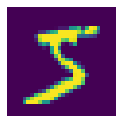

In [13]:
plt.figure(figsize=(15,2))
plt.axis("off")
plt.imshow(X_train[0])
plt.show()

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32 , kernel_size=3 , padding="SAME" , activation="relu" , input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64 , kernel_size=3  , padding="SAME" , activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128 , kernel_size=3 , padding="SAME" , activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128 , activation="relu"),
    keras.layers.Dense(64 , activation="relu"),
    keras.layers.Dense(10 , activation="softmax"),
])

In [27]:
model.compile(optimizer="adam" , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])
model.fit(X_train , y_train ,epochs=20, validation_split=0.1 , callbacks=[keras.callbacks.EarlyStopping(patience=10 , restore_best_weights=True)])

Epoch 1/20


C:\Users\amr\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 [==============================] - 35s 21ms/step - loss: 0.1579 - accuracy: 0.9495 - val_loss: 0.0494 - val_accuracy: 0.9845
Epoch 2/20
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0355 - val_accuracy: 0.9888
Epoch 3/20
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0465 - val_accuracy: 0.9873
Epoch 4/20
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0354 - val_accuracy: 0.9908
Epoch 5/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0326 - val_accuracy: 0.9910
Epoch 6/20
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0317 - val_accuracy: 0.9920
Epoch 7/20
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0342 - val_accura

In [28]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0223 - accuracy: 0.9934


[0.022295624017715454, 0.993399977684021]

In [30]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [33]:
score = tf.nn.softmax(predictions[0])

In [34]:
np.argmax(score)

7

In [35]:
y_test[0]

7

In [38]:
np.argmax(tf.nn.softmax(predictions[5]))

1

In [39]:
y_test[5]

1